<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../../Index.ipynb"><< Index</a>
<br>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=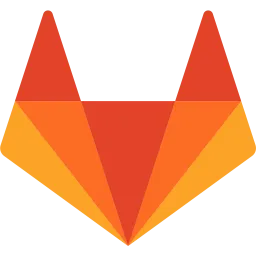" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
    
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2Focean-case-studies/HEAD?labpath=Case_studies%2FAcq_syn%2FData_cubes%2FPan_collection_cubes.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>

</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** to download from the EUMETSAT Data Store

There are no prerequisite notebooks for this module, but you may wish to investigate the following; <br>
- The **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-olci/-/blob/main/2_OLCI_advanced/2_2b_OLCI_ope_rep_time_series.ipynb" target="_blank">OLCI time series</a>** Jupyter Notebook (EUMETSAT Gitlab)
- The **<a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac_data_tailor/-/blob/master/1_Using_the_Data_Tailor_with_EUMDAC.ipynb" target="_blank">Using the Data Tailor with eumdac</a>** Jupyter Notebook (EUMETSAT Gitlab). 

</div>
<hr>

# Creating pan-collection times series and data cubes with the EUMETSAT Data Tailor

### Data used

| Dataset | EUMETSAT Data Store<br>collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Sentinel-3 OLCI level-2 full resolution | EO:EUM:DAT:0407 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_2_WFR___" target="_blank">Description</a> |
| Sentinel-3 OLCI level-2 full resolution **reprocessed** (BC003) | EO:EUM:DAT:0556 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0556" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:0556 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3A0556" target="_blank">Description</a> |


### Learning outcomes

At the end of this notebook you will know how to;
* Differentiate between reprocessed and operational data
* Construct searches for "best quality" time series across collections
* Download and tailor your products of interest
* Create and visualise a small data cube


### Outline

<center><img src='https://www.ismar.cnr.it/wp-content/uploads/2023/07/PTF-2018-05-Pomaro-1-scaled-1.jpg' align='center' width='33%'/><br><br><b>Figure 1. The Acqua Alta oceanographic tower. Image Credit: CNR-ISMAR</a></b></img><br><br></center>

For different applications it can be necessary combine multiple data sources and transform them to allow for certain types of analysis. To support this, EUMETSAT has developed a Data Tailor which supports to extraction of regions of interest, as well as geospatial and format transformations. This notebook will show how to search for a region of interest across **operational** and **reprocessed** data collections in the EUMETSAT Data Store. A list of results is then passed to the online Data Tailor web service to extract a subregion and reproject the resulting data on to a consistent projection. The end result is a small data cube which is visualised using the xcube viewer tool. 

This workflow could be used for different products available from the EUMETSAT Data Store, where they are supported by the Data Tailor. In the example here we focus on Sentinel-3 OLCI level-2 ocean colour data, around a site of interest to the ocean colour community - the Acqua Alta tower.

<div class="alert alert-info" role="alert">

## <a id='TOCTOP'></a>Contents

</div>

 1. [Step 1: Setting up our analysis](#section1)
 1. [Step 2: Authenticating the EUMETSAT Data Store](#section2)
 1. [Step 3: Selecting data from the EUMETSAT Data Store](#section3)
 1. [Step 4: Filtering the operational collection by time](#section4)
 1. [Step 5: Constructing our time series](#section5)
 1. [Step 6: Tailoring and downloading products](#section6)
 1. [Step 7: Viewing our tailored products](#section7)
 1. [Step 8: Conclusions](#section8)
 1. [Step 9: Challenges (optional)](#section9)

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting up our analysis
[Back to top](#TOCTOP)

</div>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../../README.md" target="_blank">README</a>**.

In [1]:
import datetime                           # a library that allows us to work with dates and times
import eumdac                             # a tool that helps us download via the eumetsat/data-store
import fnmatch                            # a library that allows us to filter for file types
import getpass                            # a library to help us enter passwords
import glob                               # a library that aids in searching for files
import matplotlib.pyplot as plt           # a library that support plotting
import os                                 # a library that allows us access to basic operating system commands
from pathlib import Path                  # a library to help us to construct system paths
import shutil                             # a library that allows us access to basic operating system commands like copy
import time                               # a library that helps us manage script timing
import warnings                           # a library that helps us handle warnings
import xarray as xr                       # a library that supports the use of multi-dimensional arrays in Python
from xcube.webapi.viewer import Viewer    # a library that provides the Xcube viewer

# turn off any script warnings
warnings.filterwarnings('ignore')

Lets begin by setting a few parameters that we will need for our experiment, beginning with the location of the Acqua Alta Oceanographic Tower and the size of the box we want to acquire around this location.

In [2]:
# Acqua Alta location
lat = 45.31435
lon = 12.508317

# size of the box we want to acquire around the location of interest
spatial_tolerance = 0.25

Next, lets specify the collections of interest that contain our **operational** and **reprocessed** data sources.

In [3]:
collectionID_OPE = "EO:EUM:DAT:0407"
collectionID_REP = "EO:EUM:DAT:0556"

Data from Sentinel-3 is available at various timeliness. Near real-time data (NR) is available quickly, but does not have the highest quality. Non time-critical data (NT) is available more slowly, but is higher quality. All reprocessed data is non time-critical. We never want to mix reprocessed and near real-time data, so we will limit ourselves to NT.

In [4]:
timeliness = "NT"

Lastly, for the sake of our demo, we will limit the scenes we process in the final step. You should feel free to customise these settings as you see fir for your own analyses.

In [5]:
# set the first scene to process
scene_start = 17

# set the number of scenes from the first scene to process
nscenes = 8

In the first instance of running this script, we want to download data, but in subsequent runs we may want to use what we have. The `download_data` switch below will tell us to download data (when `True`) or not (when `False`).

In [6]:
download_data = True

Now we are ready to begin gathering our data for analysis, beginning by authenticating our access to the EUMETSAT Data Store.

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Authenticating the EUMETSAT Data Store
[Back to top](#TOCTOP)

</div>

<div class="alert alert-block alert-success">

### Accessing the EUMETSAT Data Store

To access Copernicus marine data from the <a href="https://data.eumetsat.int " target="_blank">EUMETSAT Data Store</a>, we will use the EUMETSAT Data Access Client (`eumdac`) python package. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install eumdac using;

`conda install -c eumetsat eumdac`

You can also find the source code on the <a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac " target="_blank">EUMETSAT GitLab</a>. Please visit the EUMETSAT user portal for more information on the <a href="https://user.eumetsat.int/data-access/data-store " target="_blank">EUMETSAT Data Store</a> and <a href="https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide " target="_blank">eumdac</a>.

To download data from the EUMETSDAT Data Store via API, you need to provide credentials. To obtain these you should first register at for an <a href="https://eoportal.eumetsat.int/" target="_blank">EUMETSAT Earth Observation Portal account</a>. Once you have an account, you can retrieve your `<your_consumer_key>` and `<your_consumer_secret>` from the <a href="https://api.eumetsat.int/api-key/ " target="_blank">"EUMETSAT Data Store API"</a> page (*Note: you must click the "Show hidden fields" button at the bottom of the page to see the relevant fields*). If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: your key and secret are permanent, so you should take care to never share them*

</div>

In [7]:
# load credentials
eumdac_credentials_file = Path(Path.home() / '.eumdac' / 'credentials')

if os.path.exists(eumdac_credentials_file):
    consumer_key, consumer_secret = Path(eumdac_credentials_file).read_text().split(',')
else:
    # creating authentication file
    consumer_key = input('Enter your consumer key: ')
    consumer_secret = getpass.getpass('Enter your consumer secret: ')
    try:
        os.makedirs(os.path.dirname(eumdac_credentials_file), exist_ok=True)
        with open(eumdac_credentials_file, "w") as f:
            f.write(f'{consumer_key},{consumer_secret}')
    except:
        pass
        
token = eumdac.AccessToken((consumer_key, consumer_secret))
print(f"This token '{token}' expires {token.expiration}")

This token '07d0918b-de20-3b1d-80e4-c3305446bb1a' expires 2024-04-30 15:50:37.527082


Now we have a token, we can create an instance of the EUMETSAT Data Store.

In [8]:
datastore = eumdac.DataStore(token)

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Selecting data from the EUMETSAT Data Store
[Back to top](#TOCTOP)

</div>

Now we have authenticated our `datastore` object, lets connect to the two collections we are interested in using the `get_collection` method.

In [9]:
# Use collection ID
collection_OPE = datastore.get_collection(collectionID_OPE)
collection_REP = datastore.get_collection(collectionID_REP)

We can get information on each collections using the checking the `abstract` property.

In [10]:
for collection in [collection_OPE, collection_REP]:
    print(f"{collection.title}\n---\n{collection.abstract}\n")

OLCI Level 2 Ocean Colour Full Resolution - Sentinel-3
---
OLCI (Ocean and Land Colour Instrument) Ocean Colour Geophysical Products. Full Resolution: 300m at nadir. All Sentinel-3 NRT products are available at pick-up point in less than 3h. Level 2 marine products include the following: * water-leaving reflectances in 16 bands, Oa**_reflectance (Baseline Atmospheric Correction (BAC) algorithm, bands: 400, 412, 442, 490, 510, 560, 620, 665, 674, 681, 709, 754, 779, 865, 885, 1024 nanometer (nm)); *algal pigment concentration in clear waters, chl_oc4me (BAC and maximum band ratio algorithm, log10 scaled); *algal pigment concentration in turbid waters, chl_nn (neural net algorithm, log10 scaled); *total suspended matter concentration, tsm_nn (neural net algorithm, log10 scaled); *diffuse attenuation coefficient Kd of downward irradiance at 490 nm, trsp (BAC and M07 algorithm, log10 scaled); *absorption coefficient at 443 nm of coloured detrital and dissolved organic matter, iop_nn (neura

We will now search in each of the two collections. Want to make the longest time series possible, do we are only going to filter our search by `timeliness` and our region of interest. We can do this as follows;

In [11]:
# make a very small box around our proposed location
ROI = [[lon - spatial_tolerance, lat - spatial_tolerance],
       [lon - spatial_tolerance, lat + spatial_tolerance],
       [lon + spatial_tolerance, lat + spatial_tolerance],
       [lon + spatial_tolerance, lat - spatial_tolerance],
       [lon - spatial_tolerance, lat - spatial_tolerance]]

# convert this to a WKT polygon
polygon = 'POLYGON(({}))'.format(','.join(["{} {}".format(*coord) for coord in ROI]))

# search for our products
products_OPE = collection_OPE.search(geo=polygon, timeliness=timeliness)
products_REP = collection_REP.search(geo=polygon, timeliness=timeliness)

Lets see how any products these searches yield....

In [12]:
print(f"Found {len(products_REP)} reprocessed products")
print(f"Found {len(products_OPE)} operational products")

Found 2039 reprocessed products
Found 1546 operational products


<div class="alert alert-info" role="alert">

## <a id='section4'></a>Step 4: Filtering the operational collection by time
[Back to top](#TOC-TOP)

</div>

If our reprocessing and operational records overlap we only wish to retain the former. Put another way, we only want to include the operational products that were created after the end of the reprocessing was completed. We can do this by filtering the operational collection by date, limiting it to dates after the last available reprocessed products to now.

In [13]:
latest = products_REP.first()
file_tags = str(latest).split('_')
file_tags = [i for i in file_tags if i]
latest_date = file_tags[4]
print(f"The last available reprocessing products is at {latest_date}")

products_OPE = collection_OPE.search(geo=polygon,
                                     dtstart=datetime.datetime.strptime(latest_date, "%Y%m%dT%H%M%S") + datetime.timedelta(seconds=1),
                                     timeliness=timeliness)

print(f"Found {len(products_OPE)} matching products that occur after the end of the reprocessing")

The last available reprocessing products is at 20210428T094703
Found 1546 matching products that occur after the end of the reprocessing


<div class="alert alert-info" role="alert">

## <a id='section5'></a>Step 5: Constructing our time series
[Back to top](#TOC-TOP)

</div>

We now have two sets of matching products, one reprocessed and one operational that begins once the reprocessed record is complete. Lets combine these into one list...

In [14]:
# first we convert our REP search results to a product list so that we can concatenate the two records
final_products_REP = [item for item in products_REP]
final_products_OPE = [item for item in products_OPE]

# then we concatenate the lists
final_products = final_products_OPE + final_products_REP

..and do a quick check on our data coverage to make sure that the reprocessed and operational collections match nicely at the join of the two.

In [15]:
print(f"The last available reprocessed product is:\n{str(final_products_REP[0])}")
print(f"The first available operational product is:\n{str(final_products_OPE[-1])}")

The last available reprocessed product is:
S3A_OL_2_WFR____20210428T094703_20210428T095003_20220308T095437_0179_071_136______MAR_R_NT_003.SEN3
The first available operational product is:
S3A_OL_2_WFR____20210429T092052_20210429T092352_20210430T193628_0179_071_150_2160_MAR_O_NT_003.SEN3


Everything looks good! We are read to get the data!

<div class="alert alert-info" role="alert">

## <a id='section6'></a>Step 6: Tailoring and downloading products
[Back to top](#TOC-TOP)

</div>

We could, at this stage, download the data directly, but as we want to make a data cube we need to take advantage of another EUMETSAT service; the Data Tailor Web Service. The Data Tailor Web Service allows us to perform remote processing on the items we searched for. You can find more information on its usage on our <a href="https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide#ID-Data-Tailor" target="_blank">EUMDAC User Portal</a> pages. We can instantiate the Data Tailor as follows.

In [16]:
datatailor = eumdac.DataTailor(token)

We have a number of processes to perform, and we can stage these in one "chain" configuration. We will add the following steps;

* `roi`: The data are large, and we may not need to work with entire granules. We can use the `roi` option to subset our data.
* `filter`: We also do not need to work with every variable. In our case, we only care about the neural network chlorophyll concentration, and we can select this from the available "bands" as required.
* `projection`: Level-2 OLCI data is made available on the instrument grid, meaning the the granules that cover a specified point do no exactly overlap. We need to transform the data to a common grid, and we can use reprojection to do this via the `projection` option.
* `resample_resolution`: we need to set the output resolution of our projected product in degrees. We should set this to as close to the native resolution of the sensor as possible, but not exceed it. For OLCI full resolution 300 m products 0.003 is a suitable number.
* `format`: We want to ensure that we get output in netCDF

*Note that the `product` keyword is determined by the data we are working with, in thicase OLCI Level-2 full resolution products (OLL2WFR).*

In [17]:
# Defining the chain configuration
chain = eumdac.tailor_models.Chain(
    product='OLL2WFR',
    roi={"NSWE" : [lat+spatial_tolerance, lat-spatial_tolerance, lon-spatial_tolerance, lon+spatial_tolerance]},
    filter={"bands" : ["chl_nn"]},
    projection='geographic',
    resample_resolution=[0.003, 0.003],
    format='netcdf4'
)

Lets select some of our products to customise with out Data Tailor chain...

In [18]:
# select a few products for our example
selected_products = final_products[scene_start:scene_start+nscenes]

Finally, lets iterate through our selected products, feeding them into the Data Tailor one at a time. Each will be customised according to our processing chain and downloaded when done. The cell below will monitor the remote service to see if the customisation is successful or not. You can always manually check what is running by going to <a href="https://tailor.eumetsat.int/launchpad" target="_blank">https://tailor.eumetsat.int/launchpad</a>.

In [19]:
if download_data:
    
    sleep_time = 10
    
    for product in selected_products:
    
        print(f"Customising {product}")
        customisation = datatailor.new_customisation(product, chain=chain)
        status = customisation.status
        
        # Monitor the customisation
        while status:
            # Get the status of the ongoing customisation
            status = customisation.status
        
            if "DONE" in status:
                print(f"Customisation {customisation._id} is successfully completed.")
                break
            elif status in ["ERROR","FAILED","DELETED","KILLED","INACTIVE"]:
                print(f"Customisation {customisation._id} was unsuccessful. Customisation log is printed.\n")
                print(customisation.logfile)
                break
            elif "QUEUED" in status:
                print(f"Customisation {customisation._id} is queued.")
            elif "RUNNING" in status:
                print(f"Customisation {customisation._id} is running.")
            time.sleep(sleep_time)
    
        # Download
        print(f"Customisation {customisation._id} outputs downloading.")
        nc, = fnmatch.filter(customisation.outputs, '*.nc') 
    
        with customisation.stream_output(nc,) as stream, \
            open(stream.name, mode='wb') as fdst:
            shutil.copyfileobj(stream, fdst)
    
        # Tidy up (if successful)
        print(f"Customisation {customisation._id} outputs cleared.")
        customisation.delete()

<div class="alert alert-info" role="alert">

## <a id='section7'></a>Step 7: Viewing our tailored products
[Back to top](#TOC-TOP)

</div>

We now have a series of subset, reprojected OLCI Level-2 chlorophyll products in netCDF format. These tiles exactly overlap and so can be concatenated in time to form a "data cube". The products themselves do not contain a time variable, but this is encoded in the file name. Lets fetch all of our files and create a `times` variable from their names, as follows;

In [20]:
downloaded_files = sorted(glob.glob("OLL2*"))
times = [datetime.datetime.strptime(downloaded_file.split('_')[1],"%Y%m%dT%H%M%SZ") for downloaded_file in downloaded_files]

Lets now open all of our files in an xarray ojbect and append a time variable using the information in our `times` list.

In [21]:
ds = xr.open_mfdataset(downloaded_files, combine='nested', concat_dim="time")
ds["time"] = times

To view our data cube, we are going to use the <a href="https://xcube.readthedocs.io/en/latest/examples/xcube_serve.html" target="_blank">XCube viewer</a>. This is part of the excellent Xcube that can be used to serve data cubes, both local and remote through various platforms. Here, we will simply launch the viewer in our notebook.

To do this, we need to specify a configuration file that specified the "Styles" we want to use to describe our data. Please consult the documentation in the previous link for more information on how to adapt this to your purposes. In our case, we will simply specify the identifier of our variable "CHL", the name of the variable in `ds` that contains this information "chl_nn", then range (in log space) of the data, and the colormap to use.

In [22]:
viewer = Viewer(
    server_config={
        "Styles": [
            {
                "Identifier": "CHL",
                "ColorMappings": {
                    "chl_nn": {"ValueRange": [-2, 2], "ColorBar": "viridis"}
                },
            }
        ]
    }
)

Lets now add this data set to our viewer

In [23]:
viewer.add_dataset(ds, style="CHL");

Finally, lets show the viewer...

In [24]:
viewer.show()

404 GET /viewer/config/config.json (127.0.0.1): xcube viewer has not been been configured
404 GET /viewer/config/config.json (127.0.0.1) 13.98ms


<div class="alert alert-info" role="alert">

## <a id='section8'></a>8. Conclusions
[Back to top](#TOCTOP)

</div>

From the workflow above you should understand how to create long time series from a combination of operational and reprocessed collections available in the EUMETSAT Data Store. Using the Data Tailor you should be able to extract a region of interest and reproject data from individual files to create a data cube. Tools such as the xcube viewer support quick visualisation and exploration of these data sets.

<div class="alert alert-warning" role="alert">

## <a id='section9'></a>9. Challenge
[Back to top](#TOCTOP)

</div>

Now that you have learned how to create your own data cubes, there are many other variations of this workflow you could explore.
- Try and extract a different variable from the OLCI level-2 data e.g. TSM_NN
- Set up a search and download data from another data collection e.g. SST - you will have to adapt how the data is read, and note that other collections might have much bigger files!

<hr>
<a href="../../../Index.ipynb"><< Index</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>